In [1]:
from getpass import getuser  # Libaray to copy things
from pathlib import Path  # Object oriented libary to deal with paths
from tempfile import (
    NamedTemporaryFile,
    TemporaryDirectory,
)  # Creating temporary Files/Dirs
from dask.utils import format_bytes
from distributed import (
    Client,
    progress,
    wait,
)  # Libaray to orchestrate distributed resources
from dask_jobqueue import SLURMCluster  # Setting up distributed memories via slurm
import numpy as np  # Pythons standard array library
import xarray as xr  # Libary to work with labeled n-dimensional data
import dask  # Distributed data libary
import dask.distributed
import multiprocessing
from subprocess import run, PIPE
import sys
import os
import warnings

warnings.filterwarnings(action="ignore")
import pandas as pd

dask.config.config.get("distributed").get("dashboard").update(
    {"link": "{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status"}
)

In [2]:
ncpu = multiprocessing.cpu_count()
processes = False
nworker = 2
threads = ncpu // nworker
print(
    f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}, processes: {processes}"
)
client = Client(
    processes=processes,
    threads_per_worker=threads,
    n_workers=nworker,
    memory_limit="128GB",
)
client

Number of CPUs: 256, number of threads: 128, number of workers: 2, processes: False


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://136.172.124.5:8787/status,
Dashboard: http://136.172.124.5:8787/status,Workers: 2
Total threads: 256,Total memory: 238.42 GiB
Status: running,Using processes: False
Comm: inproc://136.172.124.5/4096851/1,Workers: 2
Dashboard: http://136.172.124.5:8787/status,Total threads: 256
Started: Just now,Total memory: 238.42 GiB
Comm: inproc://136.172.124.5/4096851/4,Total threads: 128
Dashboard: http://136.172.124.5:45665/status,Memory: 119.21 GiB
Nanny: None,


In [6]:
# Define a global pattern to find the files
###cloud liquid water
glob_pattern_3d1 = "atm_2d_ml_2020"
## Define the paths of file 1 (dppp0016)
data_path1 = Path("/work/mh0287/k203123/Dyamond++/icon-aes-dyw2/experiments/dpp0029")
## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water
file_names1 = sorted([str(f) for f in data_path1.rglob(f"*{glob_pattern_3d1}*.nc")])[:]

In [14]:
file_names1[0]

'/work/mh0287/k203123/Dyamond++/icon-aes-dyw2/experiments/dpp0029/dpp0029_atm_2d_ml_20200120T000000Z.nc'

In [12]:
a = xr.open_dataset('/work/mh0287/k203123/Dyamond++/icon-aes-dyw2/experiments/dpp0029/dpp0029_atm_2d_ml_20201231T000000Z.nc')
a

<xarray.Dataset>
Dimensions:  (time: 1, ncells: 20971520)
Coordinates:
  * time     (time) float64 2.02e+07
Dimensions without coordinates: ncells
Data variables: (12/36)
    ps       (time, ncells) float32 ...
    psl      (time, ncells) float32 ...
    rsdt     (time, ncells) float32 ...
    rsut     (time, ncells) float32 ...
    rsutcs   (time, ncells) float32 ...
    rlut     (time, ncells) float32 ...
    ...       ...
    tauu     (time, ncells) float32 ...
    tauv     (time, ncells) float32 ...
    sfcwind  (time, ncells) float32 ...
    uas      (time, ncells) float32 ...
    vas      (time, ncells) float32 ...
    tas      (time, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  15
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9
    title:                ICON simulation
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@add96e8c60ea3f...
    history:              /work/mh0287/k203123/GIT/icon-aes-dyw2/bin/icon_dpp...
    references:           see MPIM/DWD publications
    comment:              Sapphire Dyamond (k203123) on m21233 (Linux 2.6.32-...

In [19]:
print(len(file_names1))

343


In [23]:
dset1 = xr.open_mfdataset(
    file_names1[0:100], combine="by_coords", chunks="auto", engine="netcdf4", parallel=True
)

2023-12-19 02:38:51,779 - distributed.worker - WARNING - Compute Failed
Key:       open_dataset-52740852-ca06-44b4-9f49-233442c10636
Function:  execute_task
args:      ((<function apply at 0x7fa4a26a1ea0>, <function open_dataset at 0x7fa482dae8c0>, ['/work/mh0287/k203123/Dyamond++/icon-aes-dyw2/experiments/dpp0029/dpp0029_atm_2d_ml_20201208T000000Z.nc'], (<class 'dict'>, [['engine', 'netcdf4'], ['chunks', 'auto']])))
kwargs:    {}
Exception: "AttributeError('NetCDF: Not a valid ID')"

2023-12-19 02:38:51,783 - distributed.worker - WARNING - Compute Failed
Key:       open_dataset-8e65803c-9d8a-450b-b929-fc515e226eb5
Function:  execute_task
args:      ((<function apply at 0x7fa4a26a1ea0>, <function open_dataset at 0x7fa482dae8c0>, ['/work/mh0287/k203123/Dyamond++/icon-aes-dyw2/experiments/dpp0029/dpp0029_atm_2d_ml_20201028T000000Z.nc'], (<class 'dict'>, [['engine', 'netcdf4'], ['chunks', 'auto']])))
kwargs:    {}
Exception: "AttributeError('NetCDF: Not a valid ID')"

2023-12-19 02:38:51,

In [24]:
dset1

<xarray.Dataset>
Dimensions:  (time: 223, ncells: 20971520)
Coordinates:
  * time     (time) float64 2.02e+07 2.02e+07 2.02e+07 ... 2.02e+07 2.02e+07
Dimensions without coordinates: ncells
Data variables: (12/36)
    ps       (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    psl      (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    rsdt     (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    rsut     (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    rsutcs   (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    rlut     (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    ...       ...
    tauu     (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    tauv     (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    sfcwind  (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    uas      (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    vas      (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
    tas      (time, ncells) float32 dask.array<chunksize=(2, 16777214), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  15
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9
    title:                ICON simulation
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@432d202fb95b6d...
    history:              /work/mh0287/k203123/GIT/icon-aes-dyw2/bin/icon_dpp...
    references:           see MPIM/DWD publications
    comment:              Sapphire Dyamond (k203123) on m21281 (Linux 2.6.32-...

In [25]:
format_bytes(dset1.nbytes)

'627.19 GiB'

In [26]:
pr_data = dset1["pr"]
pr_data

<xarray.DataArray 'pr' (time: 223, ncells: 20971520)>
dask.array<concatenate, shape=(223, 20971520), dtype=float32, chunksize=(2, 16777214), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2.02e+07 2.02e+07 2.02e+07 ... 2.02e+07 2.02e+07
Dimensions without coordinates: ncells
Attributes:
    standard_name:                pr
    long_name:                    precipitation flux
    units:                        kg m-2 s-1
    param:                        52.1.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [27]:
time1 = pd.to_datetime(pr_data.time.data, format="%Y%m%d")
hours = (pr_data.time.values % 1) * 24
time2 = pd.to_datetime(hours, format="%H")
timenew = pd.to_datetime(pd.to_numeric(time2 - time2[0]) + pd.to_numeric(time1))

In [28]:
pr_data["time"] = timenew

In [29]:
pr_data.time

<xarray.DataArray 'time' (time: 223)>
array(['2020-01-20T00:00:00.000000000', '2020-01-20T06:00:00.000000000',
       '2020-01-20T12:00:00.000000000', ..., '2020-04-26T00:00:00.000000000',
       '2020-04-27T00:00:00.000000000', '2020-04-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T06:00:00 ... 2020-04-28

In [30]:
pr_data.time[0:5] # 6 hourly

<xarray.DataArray 'time' (time: 5)>
array(['2020-01-20T00:00:00.000000000', '2020-01-20T06:00:00.000000000',
       '2020-01-20T12:00:00.000000000', '2020-01-20T18:00:00.000000000',
       '2020-01-21T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T06:00:00 ... 2020-01-21

In [32]:
pr_daily = (
    pr_data.sel(time=slice("2020-02-10", "2020-03-10"))
    .resample(time="1D", skipna=True)
    .mean()
)

In [33]:
pr_daily

<xarray.DataArray 'pr' (time: 30, ncells: 20971520)>
dask.array<stack, shape=(30, 20971520), dtype=float32, chunksize=(1, 16777214), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-02-10 2020-02-11 ... 2020-03-10
Dimensions without coordinates: ncells
Attributes:
    standard_name:                pr
    long_name:                    precipitation flux
    units:                        kg m-2 s-1
    param:                        52.1.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [34]:
####grid information
filegrid = "/pool/data/ICON/grids/public/mpim/0015/icon_grid_0015_R02B09_G.nc"
dsetgrid = xr.open_dataset(filegrid, chunks="auto", engine="netcdf4").rename(
    {"cell": "ncells"}
)

In [35]:
dsetgrid

<xarray.Dataset>
Dimensions:                         (ncells: 20971520, nv: 3, vertex: 10485762,
                                     ne: 6, edge: 31457280, no: 4, nc: 2,
                                     max_stored_decompositions: 4, two_grf: 2,
                                     cell_grf: 14, max_chdom: 1, edge_grf: 24,
                                     vert_grf: 13)
Coordinates:
    clon                            (ncells) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    clat                            (ncells) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    vlon                            (vertex) float64 dask.array<chunksize=(10485762,), meta=np.ndarray>
    vlat                            (vertex) float64 dask.array<chunksize=(10485762,), meta=np.ndarray>
    elon                            (edge) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    elat                            (edge) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
Dimensions without coordinates: ncells, nv, vertex, ne, edge, no, nc,
                                max_stored_decompositions, two_grf, cell_grf,
                                max_chdom, edge_grf, vert_grf
Data variables: (12/91)
    clon_vertices                   (ncells, nv) float64 dask.array<chunksize=(16777214, 1), meta=np.ndarray>
    clat_vertices                   (ncells, nv) float64 dask.array<chunksize=(16777214, 1), meta=np.ndarray>
    vlon_vertices                   (vertex, ne) float64 dask.array<chunksize=(5592404, 3), meta=np.ndarray>
    vlat_vertices                   (vertex, ne) float64 dask.array<chunksize=(5592404, 3), meta=np.ndarray>
    elon_vertices                   (edge, no) float64 dask.array<chunksize=(16777214, 1), meta=np.ndarray>
    elat_vertices                   (edge, no) float64 dask.array<chunksize=(16777214, 1), meta=np.ndarray>
    ...                              ...
    edge_dual_normal_cartesian_x    (edge) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    edge_dual_normal_cartesian_y    (edge) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    edge_dual_normal_cartesian_z    (edge) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    cell_circumcenter_cartesian_x   (ncells) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    cell_circumcenter_cartesian_y   (ncells) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    cell_circumcenter_cartesian_z   (ncells) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
Attributes: (12/43)
    title:                    ICON grid description
    institution:              Max Planck Institute for Meteorology/Deutscher ...
    source:                   git@git.mpimet.mpg.de:GridGenerator.git
    revision:                 d00fcac1f61fa16c686bfe51d1d8eddd09296cb5
    date:                     20180529 at 222250
    user_name:                Rene Redler (m300083)
    ...                       ...
    topography:               modified SRTM30
    subcentre:                1
    number_of_grid_used:      15
    history:                  Thu Aug 16 11:05:44 2018: ncatted -O -a ICON_gr...
    ICON_grid_file_uri:       http://icon-downloads.mpimet.mpg.de/grids/publi...
    NCO:                      netCDF Operators version 4.7.5 (Homepage = http...

In [37]:
pr_mean = pr_daily.mean(dim="time").compute()

In [38]:
pr_mean

<xarray.DataArray 'pr' (ncells: 20971520)>
array([1.3562195e-05, 1.3487518e-05, 1.3580961e-05, ..., 3.3366538e-05,
       3.4132456e-05, 3.4461165e-05], dtype=float32)
Dimensions without coordinates: ncells

In [40]:
format_bytes(pr_mean.nbytes)

'80.00 MiB'

In [42]:
pr_mean = pr_mean.assign_coords(
    clon=("ncells", dsetgrid.clon.data * 180 / np.pi),
    clat=("ncells", dsetgrid.clat.data * 180 / np.pi),
)

In [45]:
pr_mean

<xarray.DataArray 'pr' (ncells: 20971520)>
array([1.3562195e-05, 1.3487518e-05, 1.3580961e-05, ..., 3.3366538e-05,
       3.4132456e-05, 3.4461165e-05], dtype=float32)
Coordinates:
    clon     (ncells) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
    clat     (ncells) float64 dask.array<chunksize=(16777216,), meta=np.ndarray>
Dimensions without coordinates: ncells

In [48]:
pr_mean.clon[0:5]

<xarray.DataArray 'clon' (ncells: 5)>
dask.array<getitem, shape=(5,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>
Coordinates:
    clon     (ncells) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    clat     (ncells) float64 dask.array<chunksize=(5,), meta=np.ndarray>
Dimensions without coordinates: ncells

In [43]:
from cartopy import crs as ccrs  # Cartography library
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib import pyplot as plt  # Standard Plotting library
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Text(0, 0.5, '')

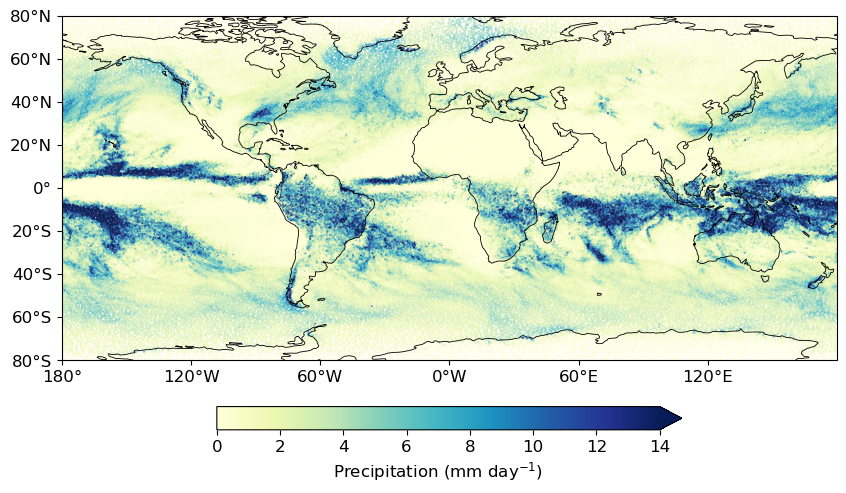

In [44]:
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
# cs1 = plt.scatter(
#     pr_mean.clon[::100],
#     pr_mean.clat[::100],
#     s=0.1,
#     c=pr_mean[::100] * 24 * 3600,
#     vmin=0,
#     vmax=14,
#     cmap="YlGnBu",
#     transform=ccrs.PlateCarree(),
# )
# cb1 = plt.colorbar(cs1, extend="max", orientation="horizontal", shrink=0.6, pad=0.1)
# cb1.ax.set_xlabel("Precipitation (mm day$^{-1}$)", fontsize=12)
# cb1.ax.tick_params(labelsize=12)
# ax.coastlines(resolution="110m", linewidth=0.6)
# ax.set_extent([-180, 179.9, -80, 80], crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-80, 81, 20), crs=ccrs.PlateCarree())
# lat_formatter = LatitudeFormatter()
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xticks(np.arange(-180, 179, 60), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.tick_params(labelsize=12)
# ax.set_xlabel(None)
# ax.set_ylabel(None)

In [47]:
# pr_mean_trop = pr_mean.sel(lat = slice(-35, 35))
# pr_mena_trop

KeyError: "'lat' is not a valid dimension or coordinate"